<a href="https://colab.research.google.com/github/zenikigai/Pengembangan_Machine_Learning_IDcamp2023/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1pQMBSmnaqgoDaMVNKHIqsTJDqf9EiFQ9

Downloading...
From: https://drive.google.com/uc?id=1pQMBSmnaqgoDaMVNKHIqsTJDqf9EiFQ9
To: /content/Restaurant reviews.csv
100% 3.59M/3.59M [00:00<00:00, 150MB/s]


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load dataset (replace with your file path)
df = pd.read_csv("Restaurant reviews.csv")
print(df)

            Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  \
0     The ambience was good, food was quite good . h...      5   
1     Ambience is too good for a pleasant evening. S...      5   
2     A must try.. great food great ambience. Thnx f...      5   
3     Soumen das and Arun was a great guy. Only beca...      5   
4     Food is good.we ordered Kodi drumsticks and ba...      5   
...                        

In [7]:
# Data cleaning and preprocessing
df["Review"] = df["Review"].astype(str)  # Ensure text data type
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")  # Convert to numeric
df = df.dropna(subset=["Rating"])  # Drop rows with missing/non-numeric ratings
df.loc[:, "Sentiment"] = df["Rating"].apply(lambda x: 1 if x > 3.5 else 0)

<ipython-input-7-c3702d2d2897>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Sentiment"] = df["Rating"].apply(lambda x: 1 if x > 3.5 else 0)


In [8]:
# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    df["Review"], df["Sentiment"], test_size=0.2, random_state=42
)

In [9]:
# Tokenization and Padding
max_words = 10000
max_len = 50
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words, oov_token="<oov>")
tokenizer.fit_on_texts(X_train)
X_train = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_val = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(X_val), maxlen=max_len)

In [10]:
# One-hot encoding for labels
num_classes = 2
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

In [35]:
# Model Definition
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    SpatialDropout1D(0.5),
    Dropout(0.5),
    Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01))),
    BatchNormalization(),
    LSTM(32, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(2, activation="softmax")
])

In [36]:
# Compilation with custom learning rate
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=custom_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [37]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [38]:
# Training
epochs = 20
batch_size = 32
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

# Evaluation
train_loss, train_accuracy = model.evaluate(X_train, y_train)
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Epoch 1/20
249/249 [==============================] - 42s 136ms/step - loss: 2.8649 - accuracy: 0.6573 - val_loss: 1.8079 - val_accuracy: 0.6433
Epoch 2/20
249/249 [==============================] - 31s 126ms/step - loss: 1.2752 - accuracy: 0.8227 - val_loss: 0.9057 - val_accuracy: 0.8756
Epoch 3/20
249/249 [==============================] - 29s 116ms/step - loss: 0.7492 - accuracy: 0.8666 - val_loss: 0.6019 - val_accuracy: 0.8680
Epoch 4/20
249/249 [==============================] - 29s 118ms/step - loss: 0.5035 - accuracy: 0.8931 - val_loss: 0.5243 - val_accuracy: 0.8605
Epoch 5/20
249/249 [==============================] - 30s 121ms/step - loss: 0.3798 - accuracy: 0.9026 - val_loss: 0.3858 - val_accuracy: 0.8866
Epoch 6/20
249/249 [==============================] - 29s 117ms/step - loss: 0.3020 - accuracy: 0.9191 - val_loss: 0.3878 - val_accuracy: 0.8721
Epoch 7/20
249/249 [==============================] - 29s 115ms/step - loss: 0.2639 - accuracy: 0.9222 - val_loss: 0.3632 - val_ac

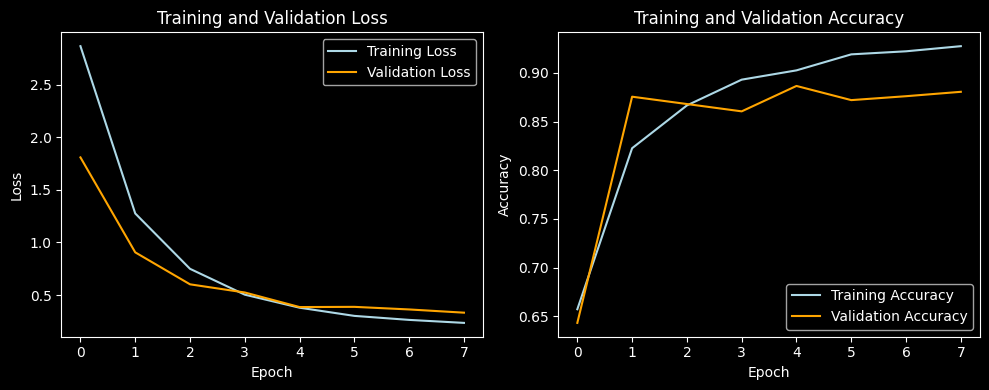

In [49]:
plt.style.use('dark_background')

# Plotting training and validation loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='lightblue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='lightblue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()

# Simpan gambar dengan mode gelap
plt.savefig('training_plot.png', dpi=150, bbox_inches='tight')
plt.show()